# The below Analysis based on the VIX Volatility Index. VIX is generated from the implied volatilities on index options for the S&P 500, and it shows the market's expectation of 30-day volatility. Known also as the "fear index," among other similar names, VIX is commonly used as a measure of investor confidence in the market, or, conversely, as a way of gauging how fearful market participants are that volatility will plague the space. The VIX tends to be largely based on stock market reactions; for instance, when the prices of stocks fall, VIX tends to Increase

## We will import the necessary libraries to bein our analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs 
import cufflinks as cf

### Import Data

In [2]:
data = pd.read_excel("resources/vix_data.xlsx")

### inspect data/clean -> Below we can see alot of data missing in certain columns. We will take and dextrace what we will need for an analysis

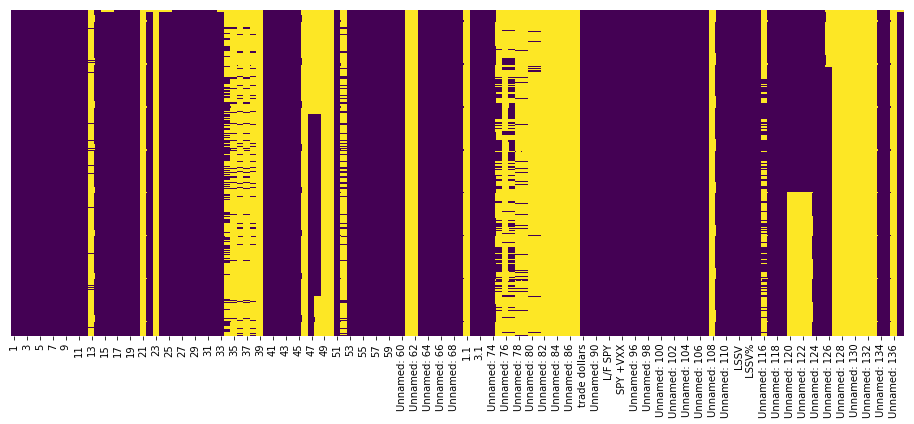

In [3]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [4]:
start_Data = data.loc[6:][[1,2,3,4,5,6,7,8,9,10]]

In [5]:
start_Data.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [6]:
start_Data.columns = ["Date","UVXY", "SPY", "VXXBEN", "VIX", "UX1", "UX2","UX3","UX4", "Day of Week"]

In [7]:
start_Data.drop([6,7], inplace=True)

In [18]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll
dates,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13


### Convert Date to Date Time

In [9]:
date_Time = pd.to_datetime(start_Data["Date"])

In [10]:
start_Data["dates"] = date_Time

#### Remove old dates

In [11]:
start_Data.drop("Date", inplace=True, axis=1)

In [19]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll
dates,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13


### Set index to new dates

In [13]:
start_Data.set_index("dates", inplace=True)

In [20]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll
dates,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13


## Will being in more data from the main file that may be used for analysis

## Days to roll

In [15]:
DaysTORoll = list(data[14].iloc[8:])

In [16]:
start_Data["Days to Roll"] = DaysTORoll

In [21]:
days_incycle = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18], axis=1)[22].iloc[8:])

In [22]:
start_Data["Day in Cycle"] = days_incycle

In [31]:
daily_Decay = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25], axis=1)[33].iloc[8:])

In [32]:
start_Data["Daily Decay"] = daily_Decay

In [33]:
VXXGREG = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,
          30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46], axis=1)[51].iloc[8:])

In [34]:
start_Data["VXXGREG"] = VXXGREG

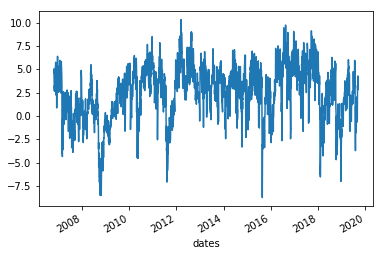

In [35]:
start_Data["VXXGREG"].plot()

In [39]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,Day in Cycle,Daily Decay,VXXGREG
dates,,,,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17,NaN,NaN,4.595668
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,NaN,NaN,4.967532
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15,NaN,NaN,5.043152
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,NaN,NaN,4.707386
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13,NaN,NaN,4.272222


### Daily % return for UX1-UX4

In [40]:
ticks = ["UX1","UX2", "UX3", "UX4"]
for t in ticks:
    start_Data[f"{t} % returns"] = start_Data[f"{t}"].pct_change()

In [44]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,Day in Cycle,Daily Decay,VXXGREG,UX1 % returns,UX2 % returns,UX3 % returns,UX4 % returns
dates,,,,,,,,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17,NaN,NaN,4.595668,NaN,NaN,NaN,NaN
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,NaN,NaN,4.967532,-0.014226,-0.025076,-0.003551,-0.008904
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15,NaN,NaN,5.043152,-0.024618,-0.024162,-0.017106,0.003455
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,NaN,NaN,4.707386,-0.020888,-0.024760,-0.023930,-0.023416
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13,NaN,NaN,4.272222,0.005333,0.004095,0.000000,0.004231


### Daily Returns for UVXY, SPY, VIX, VXXBEN

In [51]:
ts = ["UVXY","SPY","VXXBEN","VIX"]
for t in ts: 
    start_Data[f"{t} % returns"] = start_Data[f"{t}"].pct_change()

In [53]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,Daily Decay,VXXGREG,UX1 % returns,UX2 % returns,UX3 % returns,UX4 % returns,UVXY % returns,SPY % returns,VXXBEN % returns,VIX % returns
dates,,,,,,,,,,,,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17,...,NaN,4.595668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,...,NaN,4.967532,-0.014226,-0.025076,-0.003551,-0.008904,0.000000,0.002982,0.060209,-0.027076
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15,...,NaN,5.043152,-0.024618,-0.024162,-0.017106,0.003455,-0.048714,0.003409,-0.130864,-0.011132
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,...,NaN,4.707386,-0.020888,-0.024760,-0.023930,-0.023416,-0.043962,0.003108,-0.139205,-0.009381
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13,...,NaN,4.272222,0.005333,0.004095,0.000000,0.004231,0.010032,-0.006269,-0.181518,0.022727


## Regression Slope

In [69]:
Regression_slope = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,
          30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,16,52,53,54,55,56,57,58
           ,59,60,"Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63","Unnamed: 64","Unnamed: 65",
          "Unnamed: 66","Unnamed: 67","Unnamed: 68", 0, "1.1"], axis=1)["2.1"].iloc[8:])

In [70]:
start_Data["regression Slope"] = Regression_slope

In [71]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,VXXGREG,UX1 % returns,UX2 % returns,UX3 % returns,UX4 % returns,UVXY % returns,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope
dates,,,,,,,,,,,,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17,...,4.595668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,...,4.967532,-0.014226,-0.025076,-0.003551,-0.008904,0.000000,0.002982,0.060209,-0.027076,0.963
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15,...,5.043152,-0.024618,-0.024162,-0.017106,0.003455,-0.048714,0.003409,-0.130864,-0.011132,1.002
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,...,4.707386,-0.020888,-0.024760,-0.023930,-0.023416,-0.043962,0.003108,-0.139205,-0.009381,0.945
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13,...,4.272222,0.005333,0.004095,0.000000,0.004231,0.010032,-0.006269,-0.181518,0.022727,0.903


## Inverse Slope

In [76]:
inverse_Slope = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,
          30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,16,52,53,54,55,56,57,58
           ,59,60,"Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63","Unnamed: 64","Unnamed: 65",
          "Unnamed: 66","Unnamed: 67","Unnamed: 68", 0, "1.1"], axis=1)["3.1"].iloc[8:])

In [77]:
start_Data["Inverse Slope"] = inverse_Slope

In [79]:
start_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,UX1 % returns,UX2 % returns,UX3 % returns,UX4 % returns,UVXY % returns,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope,Inverse Slope
dates,,,,,,,,,,,,,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,...,-0.014226,-0.025076,-0.003551,-0.008904,0.000000,0.002982,0.060209,-0.027076,0.963,NaN
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,15,...,-0.024618,-0.024162,-0.017106,0.003455,-0.048714,0.003409,-0.130864,-0.011132,1.002,-1.002
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,...,-0.020888,-0.024760,-0.023930,-0.023416,-0.043962,0.003108,-0.139205,-0.009381,0.945,-0.945
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,13,...,0.005333,0.004095,0.000000,0.004231,0.010032,-0.006269,-0.181518,0.022727,0.903,-0.903


## This data is resonable data set to get started with our analysis. THe data will be exported and used in the vix_Analysis file in the resources

In [81]:
start_Data.to_csv("vix_data_cleaned", index = True)